In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


#loading the data set
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

#filling missing values in sleep disorder feature
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')

#dividing dependand and independant variayables 
y = df['Stress Level']
X = df.drop("Stress Level", axis=1)

#dividing uper and lover blood presure in independant variyable
X[['Upper Blood Pressure', 'Lower Blood Pressure']] = X["Blood Pressure"].apply(lambda x: pd.Series(str(x).split("/")))
X = X.drop(columns=(['Blood Pressure', 'Person ID']), axis=1)

#one hot encording in independant variyable
X = pd.get_dummies(X, columns=['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder'], dtype=int)

#One HOT encording in dependant variyable
y = pd.get_dummies(y, dtype=int)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
scaler = preprocessing.StandardScaler().fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

MLP Classifier


In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from keras.models import Sequential
from keras.layers import Dense
from sklearn.neural_network import MLPClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import preprocessing



mlp = MLPClassifier(hidden_layer_sizes=(100, 60), max_iter=10000)


model = mlp.fit(x_train, y_train)

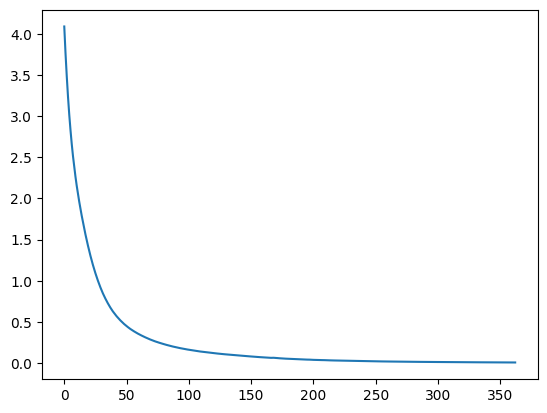

In [14]:
plt.plot(mlp.loss_curve_)

In [15]:
y_pred = model.predict(x_test)

In [16]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Acuracy", accuracy_score(y_test, y_pred))
print("Precision_score", precision_score(y_test, y_pred, average='weighted'))
print("Recall_score", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score", f1_score(y_test, y_pred, average='weighted'))



Acuracy 0.9646017699115044
Precision_score 0.965865992414665
Recall_score 0.9646017699115044
F1 Score 0.9649950835791544


AAN Squentional Model

In [3]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import numpy as np

model = Sequential()
model.add(Dense(100, activation="relu", input_dim=x_train.shape[1]))
model.add(Dense(y_train.shape[1], activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer="adam" )
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               2900      
                                                                 
 dense_1 (Dense)             (None, 6)                 606       
                                                                 
Total params: 3,506
Trainable params: 3,506
Non-trainable params: 0
_________________________________________________________________


In [4]:

history = model.fit(x_train, y_train, epochs=1000, validation_data=[x_test, y_test])

Epoch 1/1000
9/9 [==============================] - 1s 19ms/step - loss: 1.5355 - val_loss: 1.3306
Epoch 2/1000
9/9 [==============================] - 0s 4ms/step - loss: 1.2429 - val_loss: 1.0751
Epoch 3/1000
9/9 [==============================] - 0s 4ms/step - loss: 1.0271 - val_loss: 0.8650
Epoch 4/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.8570 - val_loss: 0.7158
Epoch 5/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.7297 - val_loss: 0.6000
Epoch 6/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.6276 - val_loss: 0.5038
Epoch 7/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.5458 - val_loss: 0.4321
Epoch 8/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.4831 - val_loss: 0.3811
Epoch 9/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.4321 - val_loss: 0.3439
Epoch 10/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.3925 - val_loss: 0.3155
Epoch 11/1000
9/9 

In [10]:
y_pred = model.predict(x_test)

4/4 [==============================] - 0s 2ms/step


In [11]:
b = np.zeros_like(y_pred)
b[np.arange(len(y_pred)), np.argmax(y_pred, axis=1)] = 1

In [12]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Acuracy", accuracy_score(y_test, b))
print("Precision_score", precision_score(y_test, b, average='weighted'))
print("Recall_score", recall_score(y_test, b, average='weighted'))
print("F1 Score", f1_score(y_test, b, average='weighted'))

Acuracy 0.9646017699115044
Precision_score 0.9662979351032449
Recall_score 0.9646017699115044
F1 Score 0.9645625964588933


Desition Tree 

In [3]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth =5)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [7]:
df['Stress Level'].unique()

array([6, 8, 7, 4, 3, 5], dtype=int64)

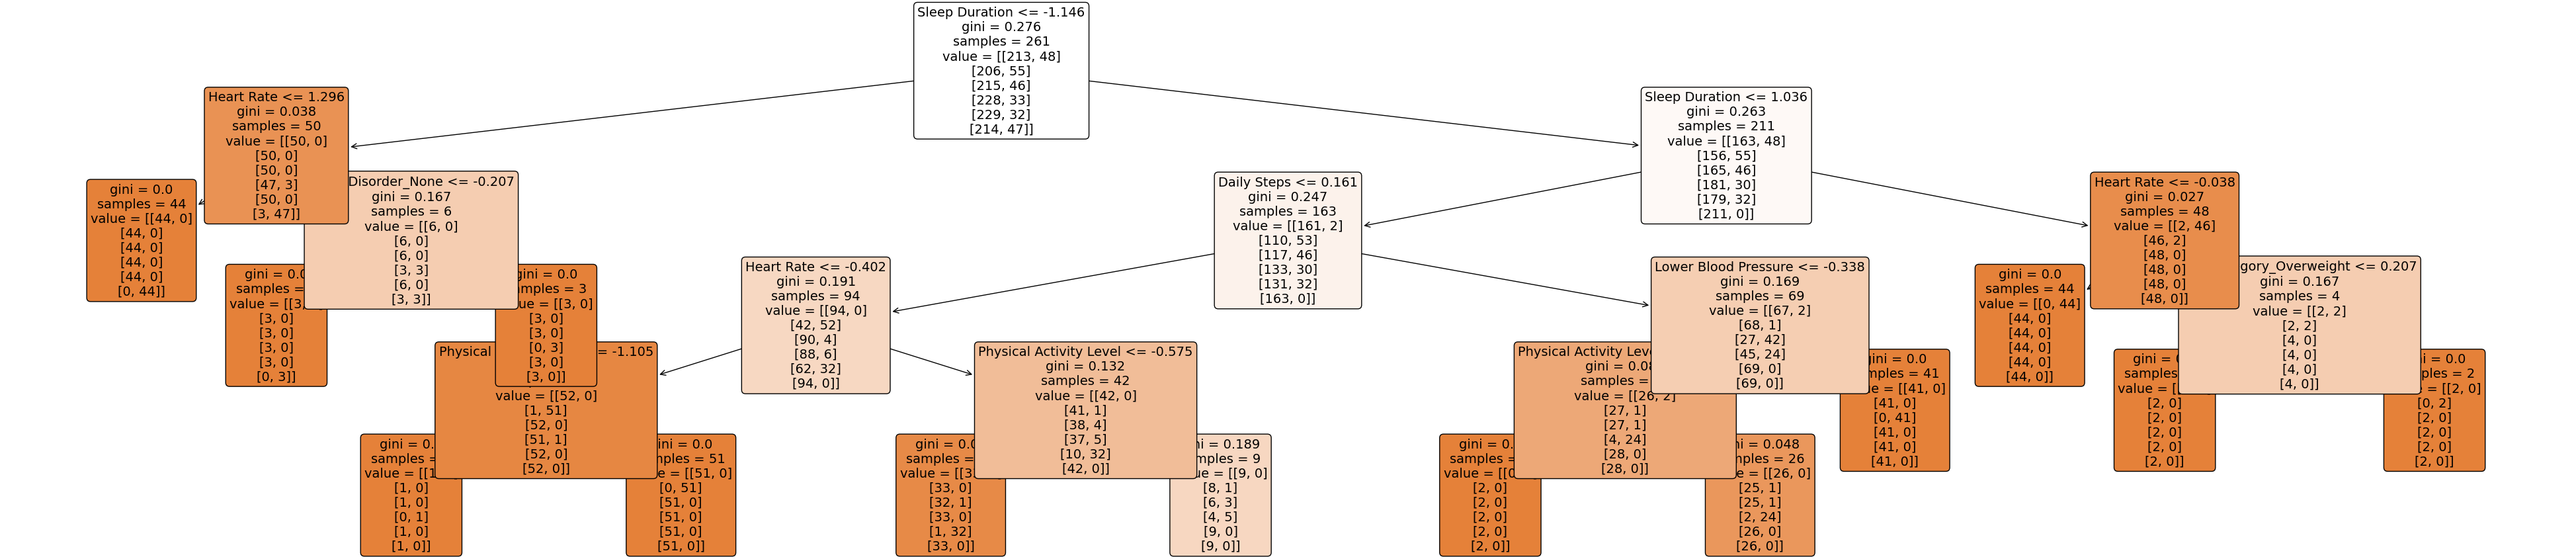

In [6]:
from sklearn import tree
import matplotlib.pyplot as plt

feature_names = X.columns
feature_names = list(feature_names)
labels = df['Stress Level'].unique()
labels = list(labels)

plt.figure(figsize=(50,10), facecolor ='white')
a = tree.plot_tree(dt,feature_names = feature_names, class_names = labels, rounded = True, filled = True, fontsize=14)
plt.show()

Random forest

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier()

In [11]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = clf.predict(x_test)

print("Acuracy", accuracy_score(y_test, y_pred))
print("Precision_score", precision_score(y_test, y_pred, average='weighted'))
print("Recall_score", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score", f1_score(y_test, y_pred, average='weighted'))

Acuracy 0.9646017699115044
Precision_score 0.9917035398230089
Recall_score 0.9646017699115044
F1 Score 0.9768388999904845


SVM 
